In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from pandas.plotting import scatter_matrix
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import os
import sys
import io
import datetime


In [20]:
datas = pd.read_excel('input/train_noNLP.xls')

In [21]:
print(datas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887 entries, 0 to 1886
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   id                                             1887 non-null   int64 
 1   icerik                                         1887 non-null   object
 2   Gecikti veya Dağıtıma Çıkmadı                  1887 non-null   int64 
 3   Evde yok notu düşüldü veya Kapıya Getirilmedi  1887 non-null   int64 
 4   Telefonlara Cevap Verilmedi                    1887 non-null   int64 
 5   İade Süreci                                    1887 non-null   int64 
 6   Teslim Alınmadı veya Teslim Edilmedi           1887 non-null   int64 
 7   Kötü Diyalog Veya Saygısız Tutum               1887 non-null   int64 
 8   Hasarlı veya Kayıp Paket                       1887 non-null   int64 
 9   Hijyen Kurallarına Uyulmadı                    1887 non-null   

In [22]:
z=[0,1,2,3,4,5,6,7]
z[0]=datas.loc[:,'Gecikti veya Dağıtıma Çıkmadı']
z[1]=datas.loc[:,'Evde yok notu düşüldü veya Kapıya Getirilmedi']
z[2]=datas.loc[:,'Telefonlara Cevap Verilmedi']
z[3]=datas.loc[:,'İade Süreci']
z[4]=datas.loc[:,'Teslim Alınmadı veya Teslim Edilmedi']
z[5]=datas.loc[:,'Kötü Diyalog Veya Saygısız Tutum']
z[6]=datas.loc[:,'Hasarlı veya Kayıp Paket']
z[7]=datas.loc[:,'Hijyen Kurallarına Uyulmadı']

In [23]:
numberofcomplaints=len(datas)
numberofcomplaints

1887

In [24]:
n_samples = len(datas)
data = datas

X = datas.loc[:,'icerik']
Y = datas.drop(['id','icerik'],axis=1).idxmax(axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)


In [25]:
X_train.shape

(1415,)

In [26]:
X_test.shape

(472,)

In [27]:
X_train

1728    Aras Kargo Ürünüm Alıcıya Ulaştırılmadı, Geri ...
987     Yurtiçi Kargo Kaybettikleri Kargoyu Israrımızl...
133     PTT Kargo Ağrı Hamur Şubesi Çalışanı--> Geçici...
202     MNG Kargo Ürünümü Teslim Etmiyor--> MNG Kargo ...
1186    Çeliktepe Sürat Kargo'da Sorun Var--> Öncelikl...
                              ...                        
835     Sürat Kargo Kargomu Kapıya Getirmedi Hafif Ola...
1216    Sürat Kargo Teslim Edilmeyen Kargolar--> Trend...
1653    Sürat Kargo İzmir Aktarma Merkezinden Yola Çık...
559     Aras Kargo Kargom 1 Haftadır Gelmiyor--> 1 haf...
684     PTT Kargo Sağlık Çalışanı Olduğum İçin Adrese ...
Name: icerik, Length: 1415, dtype: object

In [28]:
y_train

1728                      Telefonlara Cevap Verilmedi
987                  Kötü Diyalog Veya Saygısız Tutum
133                  Kötü Diyalog Veya Saygısız Tutum
202              Teslim Alınmadı veya Teslim Edilmedi
1186                    Gecikti veya Dağıtıma Çıkmadı
                            ...                      
835     Evde yok notu düşüldü veya Kapıya Getirilmedi
1216                    Gecikti veya Dağıtıma Çıkmadı
1653                      Telefonlara Cevap Verilmedi
559                     Gecikti veya Dağıtıma Çıkmadı
684              Teslim Alınmadı veya Teslim Edilmedi
Length: 1415, dtype: object

In [29]:
tks = '[A-Za-z0-9]+(?=\\s+)'

vec = CountVectorizer(token_pattern=tks)

X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

pca = TruncatedSVD(n_components=128)
X_train_vec = pca.fit_transform(X_train_vec)
X_test_vec = pca.transform(X_test_vec)

In [30]:
tks = '[A-Za-z0-9]+(?=\\s+)'

clf = svm.SVC()

pl = Pipeline([
    ('vec', CountVectorizer(token_pattern = tks)),
    ('clf', OneVsRestClassifier(LogisticRegression()))
])

pl.fit(X_train, y_train)


predicted = pl.predict(X_test)
print(f"Classification report for classifier {clf}:\n"f"{metrics.classification_report(y_test, predicted)}\n")

/home/user/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/user/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Classification report for classifier SVC():
                                               precision    recall  f1-score   support

Evde yok notu düşüldü veya Kapıya Getirilmedi       0.46      0.56      0.51        85
                Gecikti veya Dağıtıma Çıkmadı       0.58      0.74      0.65       217
                     Hasarlı veya Kayıp Paket       0.00      0.00      0.00        17
                  Hijyen Kurallarına Uyulmadı       1.00      0.25      0.40         8
             Kötü Diyalog Veya Saygısız Tutum       0.27      0.20      0.23        44
                  Telefonlara Cevap Verilmedi       0.18      0.08      0.11        38
         Teslim Alınmadı veya Teslim Edilmedi       0.18      0.12      0.14        52
                                  İade Süreci       0.25      0.09      0.13        11

                                     accuracy                           0.49       472
                                    macro avg       0.36      0.26      0.27       4

Confusion matrix:
[[ 48  27   0   0   4   1   5   0]
 [ 28 160   1   0   7   6  15   0]
 [  1  10   0   0   2   1   3   0]
 [  0   5   0   2   1   0   0   0]
 [ 12  18   1   0   9   1   3   0]
 [  4  23   0   0   4   3   1   3]
 [ 11  29   0   0   3   3   6   0]
 [  1   3   1   0   3   2   0   1]]


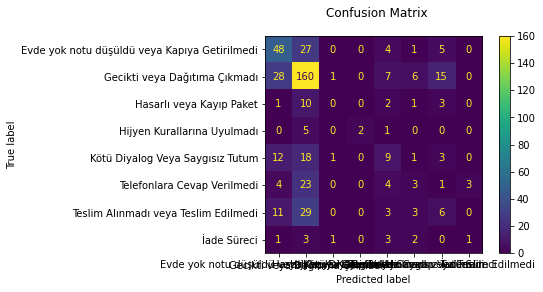

In [31]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [32]:
tks = '[A-Za-z0-9]+(?=\\s+)'

pl = Pipeline([
    ('vec', CountVectorizer(token_pattern = tks)),
    ('clf', OneVsRestClassifier(svm.SVC()))
])

pl.fit(X_train, y_train)


predicted = pl.predict(X_test)
print(f"Classification report for classifier {clf}:\n"f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC():
                                               precision    recall  f1-score   support

Evde yok notu düşüldü veya Kapıya Getirilmedi       0.44      0.51      0.47        85
                Gecikti veya Dağıtıma Çıkmadı       0.53      0.86      0.66       217
                     Hasarlı veya Kayıp Paket       0.00      0.00      0.00        17
                  Hijyen Kurallarına Uyulmadı       1.00      0.38      0.55         8
             Kötü Diyalog Veya Saygısız Tutum       0.30      0.07      0.11        44
                  Telefonlara Cevap Verilmedi       0.00      0.00      0.00        38
         Teslim Alınmadı veya Teslim Edilmedi       0.29      0.04      0.07        52
                                  İade Süreci       0.50      0.09      0.15        11

                                     accuracy                           0.50       472
                                    macro avg       0.38      0.24      0.25       4

/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
tks = '[A-Za-z0-9]+(?=\\s+)'

pl = Pipeline([
    ('vec', CountVectorizer(token_pattern = tks)),
    ('clf', svm.SVC())
])

pl.fit(X_train, y_train)


predicted = pl.predict(X_test)
print(f"Classification report for classifier {clf}:\n"f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC():
                                               precision    recall  f1-score   support

Evde yok notu düşüldü veya Kapıya Getirilmedi       0.52      0.40      0.45        85
                Gecikti veya Dağıtıma Çıkmadı       0.50      0.93      0.65       217
                     Hasarlı veya Kayıp Paket       0.00      0.00      0.00        17
                  Hijyen Kurallarına Uyulmadı       0.00      0.00      0.00         8
             Kötü Diyalog Veya Saygısız Tutum       0.00      0.00      0.00        44
                  Telefonlara Cevap Verilmedi       0.00      0.00      0.00        38
         Teslim Alınmadı veya Teslim Edilmedi       0.00      0.00      0.00        52
                                  İade Süreci       0.00      0.00      0.00        11

                                     accuracy                           0.50       472
                                    macro avg       0.13      0.17      0.14       4

/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
clf = svm.SVC()

clf.fit(X_train_vec, y_train)

predicted = clf.predict(X_test_vec)

print(f"Classification report for classifier {clf}:\n"f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC():
                                               precision    recall  f1-score   support

Evde yok notu düşüldü veya Kapıya Getirilmedi       0.47      0.44      0.45        85
                Gecikti veya Dağıtıma Çıkmadı       0.50      0.91      0.65       217
                     Hasarlı veya Kayıp Paket       0.00      0.00      0.00        17
                  Hijyen Kurallarına Uyulmadı       0.00      0.00      0.00         8
             Kötü Diyalog Veya Saygısız Tutum       0.00      0.00      0.00        44
                  Telefonlara Cevap Verilmedi       0.00      0.00      0.00        38
         Teslim Alınmadı veya Teslim Edilmedi       0.00      0.00      0.00        52
                                  İade Süreci       0.00      0.00      0.00        11

                                     accuracy                           0.50       472
                                    macro avg       0.12      0.17      0.14       4

/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print(f"Classification report for classifier {clf}:\n"f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC():
                                               precision    recall  f1-score   support

Evde yok notu düşüldü veya Kapıya Getirilmedi       0.47      0.44      0.45        85
                Gecikti veya Dağıtıma Çıkmadı       0.50      0.91      0.65       217
                     Hasarlı veya Kayıp Paket       0.00      0.00      0.00        17
                  Hijyen Kurallarına Uyulmadı       0.00      0.00      0.00         8
             Kötü Diyalog Veya Saygısız Tutum       0.00      0.00      0.00        44
                  Telefonlara Cevap Verilmedi       0.00      0.00      0.00        38
         Teslim Alınmadı veya Teslim Edilmedi       0.00      0.00      0.00        52
                                  İade Süreci       0.00      0.00      0.00        11

                                     accuracy                           0.50       472
                                    macro avg       0.12      0.17      0.14       4

/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix:
[[ 37  48   0   0   0   0   0   0]
 [ 19 198   0   0   0   0   0   0]
 [  2  15   0   0   0   0   0   0]
 [  0   8   0   0   0   0   0   0]
 [  8  36   0   0   0   0   0   0]
 [  3  35   0   0   0   0   0   0]
 [ 10  42   0   0   0   0   0   0]
 [  0  11   0   0   0   0   0   0]]


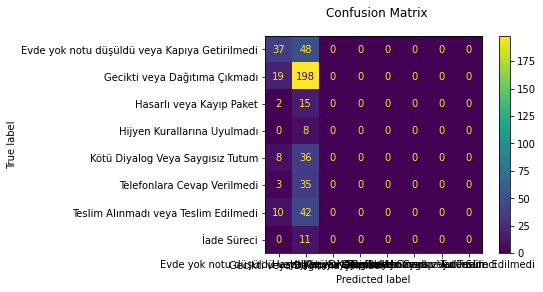

In [36]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()